## House Price Predictions
Different variables come into play in appraising a house, such as the number of bedrooms, square footage, location, and much more. So, our task here is to build a machine learning model to make reasonably accurate predictions in terms of pricing houses. It would be an opportunity for those in real estate to gain more visibility on the market as a whole. In doing so, this notebook will offer a user-friendly explanation through every step using LIME (Local Interpretable Model-agnostic Explanations) principles.

## Table of Contents
1. Environment set-up
    * Importing Libraries
    * Loading the data
2. Initial Diagnostics
    * Glimpse
    * Descriptive Statitics
    * Target Variable Analysis
    * Predictors Analysis
3. Data Cleaning
    * Missing Values
    * Outliers
    * Duplicate Observations
4. Correlation Analysis
    * Correlation Matrix
    * Strongest relationship
5. Inquiry Exploration

6. Feature Engineering

7. Machine Learning set-up
    * Train-test split
    * Cross-validation
8. Feature Selection

9. Dimensionality Reduction

10. Machine Learning - Simple Models

11. Machine Learning - Ensemble Methods

12. Hyperparameter Tuning

12. Model Performance Evaluation
 
13. Recommendation & Conclusion


# 1. Environment Set-up

In [1]:
## Importing libraries
set.seed(1)
library(dplyr)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(ggcorrplot)    # Visualize correlation matrix
library(caret)
library(VIM)           # Visualize mising values
library(mice)          # missing data imputation
library(naniar)
library(stringr)

library(corrplot)
list.files(path = "../input/house-prices-advanced-regression-techniques")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘p

[1] "data_description.txt"  "sample_submission.csv" "test.csv"             
[4] "train.csv"

In [2]:
## Loading dataset
df <- read_csv(file = '/kaggle//input/house-prices-advanced-regression-techniques/train.csv')
df %>% head()

Rows: 1460 Columns: 81

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


# 2. Initial Diagnostics

In [3]:
## Info
df %>% str()

spec_tbl_df [1,460 × 81] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id           : num [1:1460] 1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : num [1:1460] 60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr [1:1460] "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : num [1:1460] 65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : num [1:1460] 8450 9600 11250 9550 14260 ...
 $ Street       : chr [1:1460] "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr [1:1460] NA NA NA NA ...
 $ LotShape     : chr [1:1460] "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr [1:1460] "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr [1:1460] "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr [1:1460] "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr [1:1460] "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr [1:1460] "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr [1:1460] "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr [1:1460] "Norm" "Norm" "Norm" "Norm" ...
 $ 

**Takeaway:** From the glimpse above, we could already draw some observations. 
* Our dataset comprises 1460 rows and 80 columns, making it relatively small, so we would not expect the training process o to be as computationally intensive.
* For null values, most columns appear to have no missing values, while null values make up 80% for some of those variables. It indicates that we shall proceed with data cleaning and tidying before doing any statistical analysis or machine learning. 
* In terms of variable type, we have mostly int64, float64, and object. Though 'object' can indicate text or categorical, we will need to investigate further in feature engineering.

In [4]:
## Descriptive Statistics
df %>% summary()

       Id           MSSubClass      MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   Mode  :character   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                      Max.   :313.00  
                                                     NA's   :259     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:1460        Length:1460        Length:1460       
 1st Qu.:  7554   Class :character   Class :character   Class :character  
 Median :  9478   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10517                                                           
 3rd Qu.: 11602                                                  

**Takeaway:** For all 80 variables, the table above captures the basic descriptive statistics showing things like mean, standard deviation, min, max, etc. Commenting on each variable would bring little value to our overall analysis, and so we will zoom on the target variable 'SalePrice'.

In [5]:
# Stats for the target variable
df$SalePrice %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

**Takeaway:** The count indicates no null values in the column. The houses in the dataset vary from ~USD34.9k to ~USD755k, with a mean value of ~USD180k. With the standard deviation at ~USD79k, it appears that prices fluctuate pretty significantly, or we may potentially have houses with exorbitant prices (outliers) skewing the data. We will create a histogram to look at the distribution more closely.

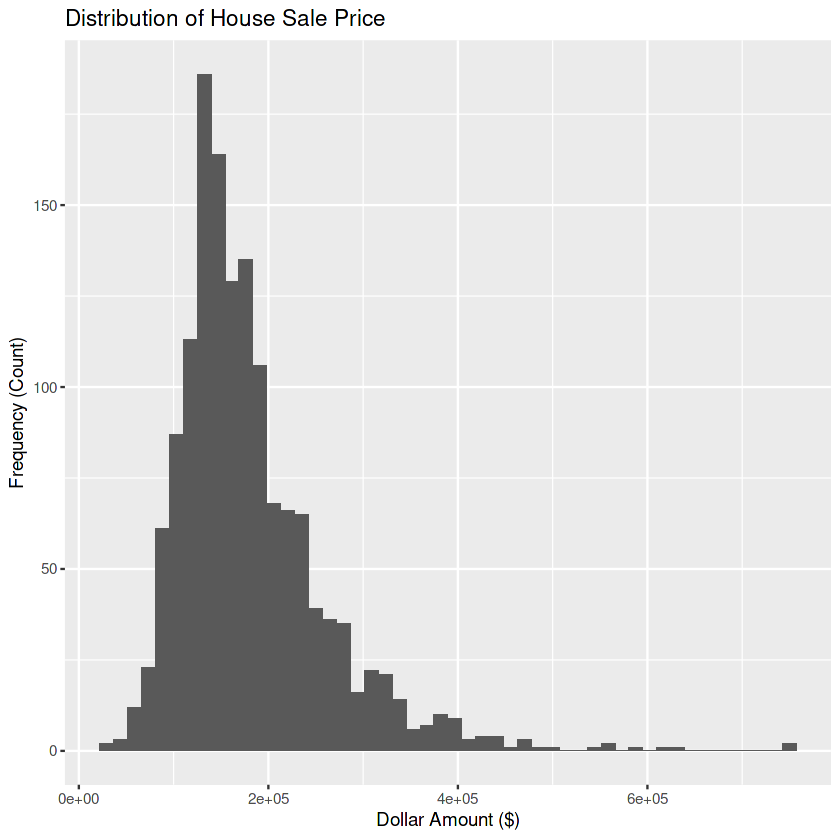

In [6]:
## Feature Variable Analysis
df %>% 
    ggplot(aes(x=SalePrice)) + 
    geom_histogram(bins = 50) +
    labs(title = "Distribution of House Sale Price",
          x = "Dollar Amount ($)", y = "Frequency (Count)")

**Takeaway:** From the histogram above, we can deduct that house sale prices in this dataset have a right-skewed distribution with outliers on the upper end, indicating luxury houses with higher price points. However, most houses appear to fall between ~USD100k and ~USD300k, relatively consistent with real estate markets in the United States.

# 3. Data Cleaning

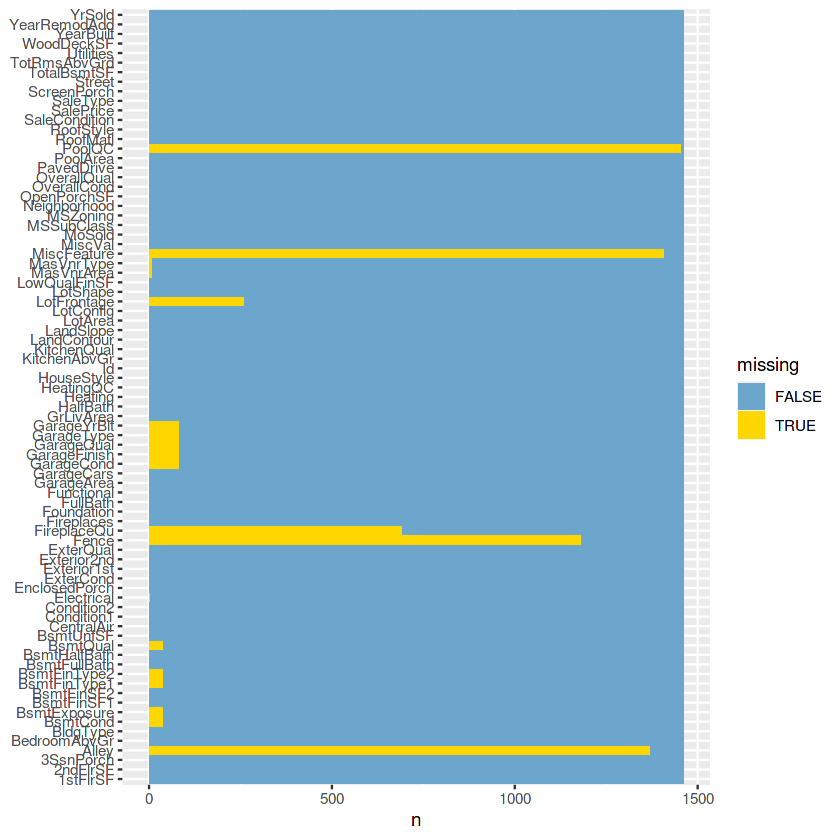

In [7]:
missvalues_visual <- 
    df  %>%
      summarise_all(list(~is.na(.)))%>%
      pivot_longer(everything(),
                   names_to = "variables", values_to="missing") %>%
      count(variables, missing) %>%
      ggplot(aes(y=variables,x=n,fill=missing))+
      geom_col()+
      scale_fill_manual(values=c("skyblue3","gold"))+
      theme(axis.title.y=element_blank())
missvalues_visual
options(repr.plot.width = 14, repr.plot.height = 5)

**Takeaway:** As the plot shows above, there are indeed null values confirming our observation in the initial diagnostics. Given that not all variables are of the same type or the same proportion of missing values, the cleaning process will attend to each column or group of similar columns.

**Definition:** When it comes to data science, we are constantly dealing with imperfect information, thus murking the waters on the quality of data overall. One of those issues is the recurrence of missing values and requires effective techniques to deal with them. Imputation methods present such an opportunity using strategies to replace null values with statistical measures like mean, mode, or median. More information [here](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/).

In [8]:
## No. of null values
null_vals <- sum(is.na(df))

# List of columns with missing values
null_cols <- which(colSums(is.na(df))>0)

# Reporting back
sprintf(fmt="We are missing %d values in our data at given percentages in the following columns:\n",
       null_vals) %>% cat()

for (i in null_cols)
    {
    col_name <- names(df[, i])
    null_val <- sum(is.na(df[col_name]))
    null_per <- (null_val / nrow(df))*100
    sprintf(fmt = " -%s: %d (%.2f%%)\n", 
            col_name, null_val, null_per) %>% cat()
}

We are missing 6965 values in our data at given percentages in the following columns:
 -LotFrontage: 259 (17.74%)
 -Alley: 1369 (93.77%)
 -MasVnrType: 8 (0.55%)
 -MasVnrArea: 8 (0.55%)
 -BsmtQual: 37 (2.53%)
 -BsmtCond: 37 (2.53%)
 -BsmtExposure: 38 (2.60%)
 -BsmtFinType1: 37 (2.53%)
 -BsmtFinType2: 38 (2.60%)
 -Electrical: 1 (0.07%)
 -FireplaceQu: 690 (47.26%)
 -GarageType: 81 (5.55%)
 -GarageYrBlt: 81 (5.55%)
 -GarageFinish: 81 (5.55%)
 -GarageQual: 81 (5.55%)
 -GarageCond: 81 (5.55%)
 -PoolQC: 1453 (99.52%)
 -Fence: 1179 (80.75%)
 -MiscFeature: 1406 (96.30%)


**LotFrontage:** As per the data dictionary, it is the linear feet of street connected to property. It indicates the measurement of a piece of land (lot) often defined by frontage and depth respectively. For instance, an house can be 50 by 150, meaning 50 feet wide (frontage) and 150 feet long. Read more about it [here](https://www.gimme-shelter.com/frontage-50043/). Given that 'LotFrontage' is one of those characteristics all houses have, the null values indicate missing information that cannot just be equal to 0. Since we cannot get back and fetch more data, we will use imputation methods for this column and other ones which may require them.

**Note:** Before proceeding to the imputation, we would like to investigate possible differences in distribution grouped by Lot shape.

Warning message:
“Removed 259 rows containing non-finite values (stat_boxplot).”


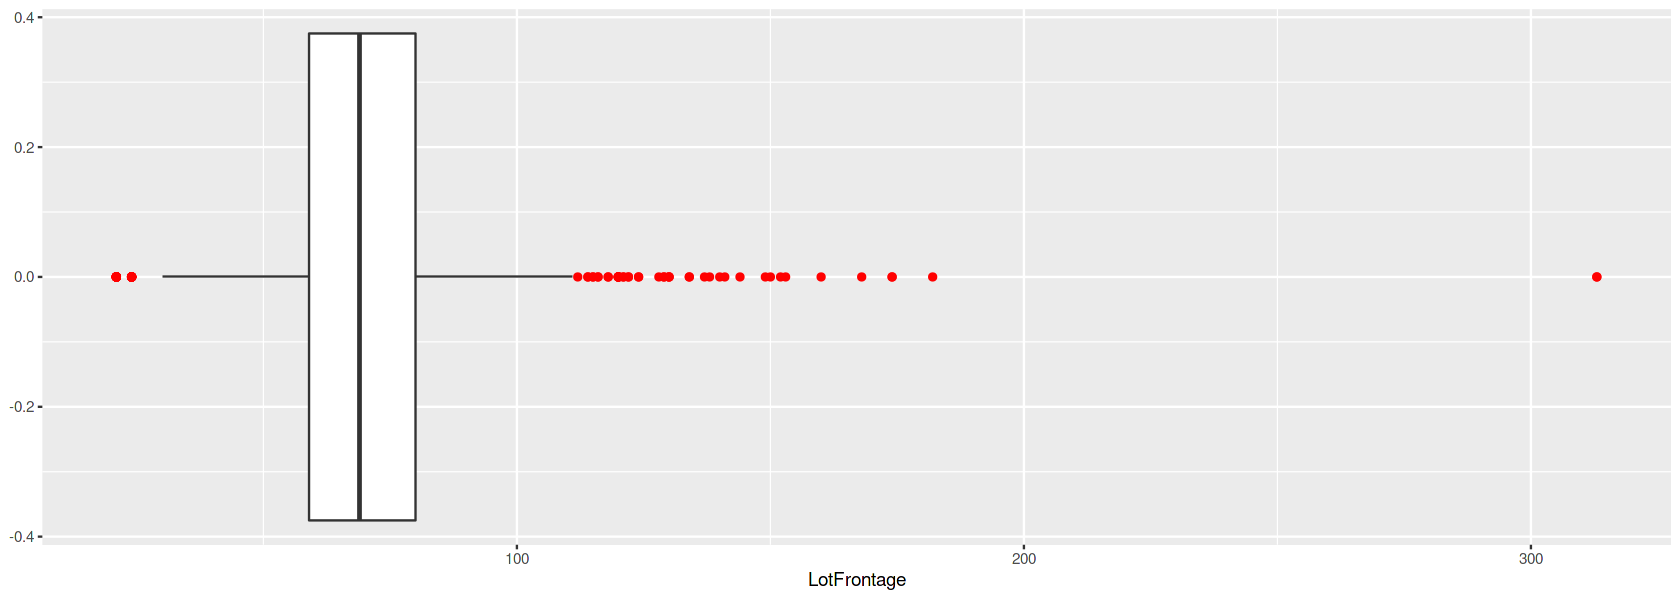

In [9]:
df %>% 
    ggplot(aes(x=LotFrontage)) +
    geom_boxplot(outlier.colour="red", outlier.shape=16,
     outlier.size=2) 

Warning message:
“Removed 259 rows containing non-finite values (stat_boxplot).”


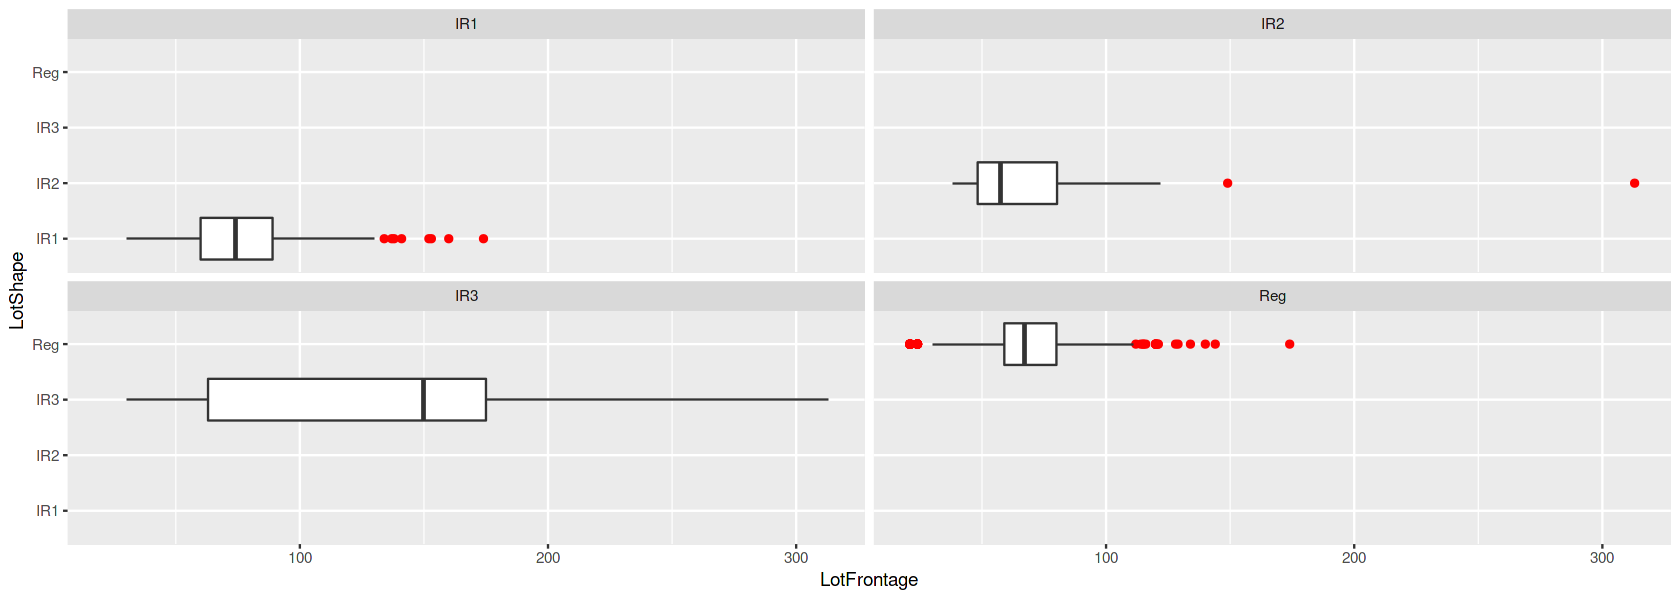

In [10]:
df %>% 
    ggplot(aes(x=LotFrontage, y=LotShape)) +
    geom_boxplot(outlier.colour="red", outlier.shape=16,
     outlier.size=2) +
    facet_wrap("LotShape")

In [11]:
sprintf(fmt = "For all houses' LotFrontage, the mean is %.2f and median is %.2f",
        mean(df$LotFrontage, na.rm=TRUE), median(df$LotFrontage, na.rm=TRUE)) %>% cat()

For all houses' LotFrontage, the mean is 70.05 and median is 69.00

In [12]:
sprintf("For: \n") %>% cat()
for (i in unique(df$LotShape))
    {
    df_i <- df %>% filter(LotShape==i)
    sprintf(
            fmt = " -%s houses, the mean LotFrontage is %.2f and median LotFrontage is %.2f\n",
            i, mean(df_i$LotFrontage, na.rm=TRUE), median(df_i$LotFrontage, na.rm=TRUE)
            ) %>% cat()
}

For: 
 -Reg houses, the mean LotFrontage is 67.04 and median LotFrontage is 67.00
 -IR1 houses, the mean LotFrontage is 76.09 and median LotFrontage is 74.00
 -IR2 houses, the mean LotFrontage is 76.50 and median LotFrontage is 57.50
 -IR3 houses, the mean LotFrontage is 138.43 and median LotFrontage is 150.00


**Takeaway:** The boxplots indicate the presence of outliers in the data with massive and small houses by widths. When broken down by 'LotShape', we also observe a notable difference in those houses categorized as IR3, in other words, of very irregular shape. In light of both the outliers and category differences, we will use the median value grouped by LotShape for the imputation process to ensure consistency in the data.

In [13]:
df <- df %>% 
  group_by(LotShape) %>% 
  mutate(LotFrontage = ifelse(is.na(LotFrontage), 
                            median(LotFrontage, na.rm = TRUE), 
                            LotFrontage))

df$LotFrontage %>% is.na() %>% sum()

[1] 0

**Alley:** As per the data dictionary, it refers to the type of alley access to property. Given the real estate market in question, it may affect the price more or less and so, the null values are indeed significant with NA indicating that there isn't one. To ensure that it is taken into account, we will rename the NA into the full phrase 'No alley access' and then proceed in encoding this categorical variable.

In [14]:
df$Alley <- df$Alley %>% replace_na('No alley access')
df$Alley %>% is.na() %>% sum()

[1] 0

**Variable Grouping:** It appears that the process in detecting missing valuies actually led to understanding those null values are actually categories significant or equal to 0 per the data dictionary. So, to be more efficient, we will make a list of those columns and the term/value we'll use to replace the na values.

In [15]:
for (i in names(df[, null_cols])) {
    # Grouping of variables dependent on the presence of a basement
    if (str_detect(i, "Bsmt") == TRUE) {
        df[, i][is.na(df[, i])] <- 'No Basement'
        
    # Grouping of variables dependent on the presence of a garage
    } else if (str_detect(i, "Garage") == TRUE) {
        if (i == 'GarageYrBlt'){
            df[, i][is.na(df[, i])] <- 0
        } else {
            df[, i][is.na(df[, i])] <- 'No Garage'
        }
        
    }
}

In [16]:
# Grouping of variables dependent on the presence of other amenities
df$MasVnrType  <- df$MasVnrType %>% replace_na('No Veneer')
df$MasVnrArea  <- df$MasVnrArea %>% replace_na(0)
df$FireplaceQu <- df$FireplaceQu %>% replace_na('No Fireplace')
df$PoolQC <- df$PoolQC %>% replace_na('No Pool')
df$Fence <- df$Fence %>% replace_na('No Fence')
df$MiscFeature <- df$MiscFeature %>% replace_na('No Misc')

**Note:** Assuming all houses have an electrical system, we will drop the obersvation having the eltrical system as a null values. 

In [17]:
# Deleting the Electrical 
df <- drop_na(df, any_of("Electrical"))

In [18]:
## No. of null values
null_vals <- df %>% is.na() %>% sum()

# Reporting back
sprintf(fmt="Afer imputation, we have missing %d values in our data.",
        null_vals) %>% cat()

Afer imputation, we have missing 0 values in our data.

# 4. Inquiry Exploration

In this section, we will generate various questions to further consolidate our understanding of the problem at hand. It will allow us to guide the machine learning process more attuned to the particular subject matter.

**Question 1:** Do bigger houses always translate into higher prices?

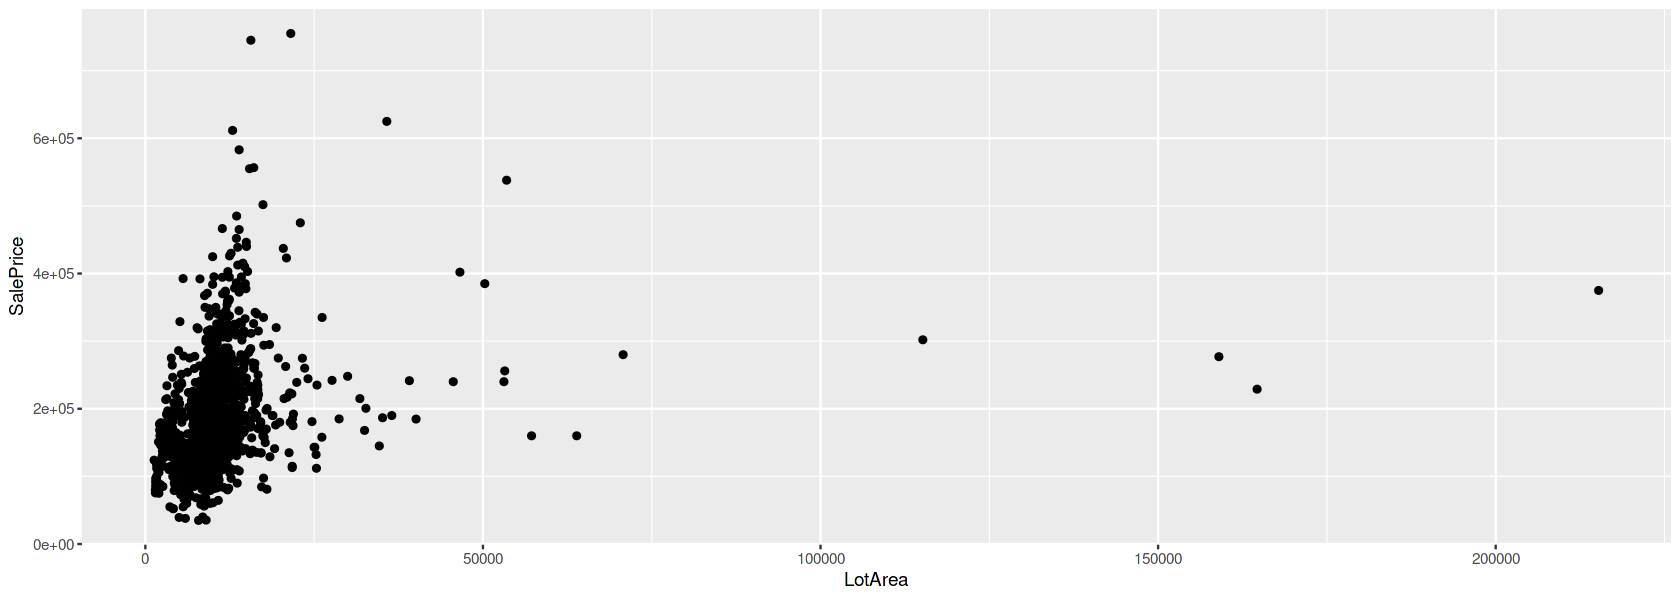

In [19]:
## Scatterplot between lotArea and SalePrice
df %>% ggplot(aes(x=LotArea, y=SalePrice)) +
  geom_point()

**Takeaway:** From the scatterplot above, there is very little evidence indicating that bigger houses are ultimiately pricier. As noted in the diagnostics, the 80 initial variables show how the house valuation process is multi-dimensional.

**Question 2:** Where is the real estate hotspot?

In [20]:
# Which neighborhood registers the most sales?
total <- df %>% 
            group_by(Neighborhood) %>%
            summarise(count = n_distinct(SalePrice)) %>% 
            arrange(desc(count)) %>%
            mutate(percent = count / sum(count) * 100)
            
total[1,] 

Neighborhood,count,percent
<chr>,<int>,<dbl>
NAmes,148,12.08163


In [21]:
# Which neighborhood registers the sales with the highest price tags?
avg <- df %>% 
            group_by(Neighborhood) %>%
            summarise(avg = mean(SalePrice)) %>% 
            arrange(desc(avg))
            
avg[1,] 

Neighborhood,avg
<chr>,<dbl>
NoRidge,335295.3


**Note:** As per the data dictionary, NAmes refers North Ames and NoRidge refers to Northridge both located in Iowa, US.

**Question 3:** What miscellaneous feature add the most value?

In [22]:
# Which miscellaneous feature is the most prevalent?
misc <- df %>% 
            group_by(MiscFeature) %>%
            summarise(count = n_distinct(SalePrice)) %>% 
            arrange(desc(count))
            
misc[2,] 

MiscFeature,count
<chr>,<int>
Shed,46


For houses with miscellaneous features, Shed is the most prevalent in 46 houses.

In [23]:
# Calculating the value added
misc_rows <- df %>% filter(MiscFeature == 'Shed')
avg_mon_val <- mean(misc_rows$MiscVal)
per_sale <- mean(misc_rows$MiscVal/misc_rows$SalePrice)*100
avg_mon_val
per_sale

[1] 697.8367

[1] 0.4753533

Shed has on average $697.84 of monetary value making up 0.48% of the house sale price on average.

# 5. Feature Engineering

**Feature Scaling:** When dealing with data, we are working with different types of which required adpated pre-processing before applying any machine learning techniques. In our content, we perform feature scaling to standardize only the values in continuous numerical variables. Read more [here](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35).

In [24]:
# Filter numeric columns
num_vars = c('LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
           'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal')

df[, num_vars] <- scale(df[, num_vars], center=TRUE, scale=TRUE)
df %>% head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,-0.2400808,-0.20705389,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2008,WD,Normal,208500
2,20,RL,0.4291975,-0.09187728,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,5,2007,WD,Normal,181500
3,60,RL,-0.1062252,0.07337612,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,9,2008,WD,Normal,223500
4,70,RL,-0.4631736,-0.09688496,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2006,WD,Abnorml,140000
5,60,RL,0.6076717,0.37483837,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,12,2008,WD,Normal,250000
6,50,RL,0.6522902,0.36031610,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,MnPrv,Shed,1.32277244,10,2009,WD,Normal,143000


**Categorical feature encoding** ensures that variables with categories/groupings are transformed into numerical inputs for the predictive modeling phase. The categorical variables are also subdivided as:
- binary (two possible outcomes)
- cardinal (no meaningful order) 
- ordinal (meaningful order) 

Read more [here](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/).

In [25]:
# List of nominal categorical variables
cat_vars = c('CentralAir', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
            'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 
            'Functional', 'GarageType', 'MiscFeature', 'SaleType', 
            'SaleCondition', 'LotShape', 'LandContour', 'Utilities', 
            'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual',
            'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
            'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PavedDrive', 'PoolQC', 'Fence')

df[cat_vars] <- lapply(df[cat_vars], factor)
df %>% head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,60,RL,-0.2400808,-0.20705389,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2008,WD,Normal,208500
2,20,RL,0.4291975,-0.09187728,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,5,2007,WD,Normal,181500
3,60,RL,-0.1062252,0.07337612,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,9,2008,WD,Normal,223500
4,70,RL,-0.4631736,-0.09688496,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2006,WD,Abnorml,140000
5,60,RL,0.6076717,0.37483837,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,12,2008,WD,Normal,250000
6,50,RL,0.6522902,0.36031610,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,MnPrv,Shed,1.32277244,10,2009,WD,Normal,143000


**Datetime Variables:** There are variables denoting dates and thus, may hold significance and impact our target variable: the house's sale price.

Based on research, we thought that the most sensible option would be to transform the datetime variables into ordinal categories in twofold:

- Direct encoding of 'MoSold' and 'YrSold' having 12 and 5 pre-defined categories that are the 12 months and 5 years respectively during which the houses in the dataset were sold.

- Binning of 'YearRemodAdd' and 'YearBuilt' into 6 categories of 10 and 20 years of interval respectively before proceeding to ordinal encoding as well.

In [26]:
df <- df %>% 
        mutate(YearRemodAdd = cut(YearRemodAdd, breaks=6),
               YearBuilt = cut(YearBuilt, breaks=6))
df %>% head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,60,RL,-0.2400808,-0.20705389,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2008,WD,Normal,208500
2,20,RL,0.4291975,-0.09187728,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,5,2007,WD,Normal,181500
3,60,RL,-0.1062252,0.07337612,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,9,2008,WD,Normal,223500
4,70,RL,-0.4631736,-0.09688496,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2006,WD,Abnorml,140000
5,60,RL,0.6076717,0.37483837,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,12,2008,WD,Normal,250000
6,50,RL,0.6522902,0.36031610,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,MnPrv,Shed,1.32277244,10,2009,WD,Normal,143000


In [27]:
# List of date categorical variables
cat_vars = c('YearRemodAdd', 'YearBuilt', 'MoSold', 'YrSold')

df[cat_vars] <- lapply(df[cat_vars], factor)
df %>% head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,60,RL,-0.2400808,-0.20705389,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2008,WD,Normal,208500
2,20,RL,0.4291975,-0.09187728,Pave,No alley access,Reg,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,5,2007,WD,Normal,181500
3,60,RL,-0.1062252,0.07337612,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,9,2008,WD,Normal,223500
4,70,RL,-0.4631736,-0.09688496,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,2,2006,WD,Abnorml,140000
5,60,RL,0.6076717,0.37483837,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,No Fence,No Misc,-0.08768802,12,2008,WD,Normal,250000
6,50,RL,0.6522902,0.36031610,Pave,No alley access,IR1,Lvl,AllPub,⋯,-0.06869184,No Pool,MnPrv,Shed,1.32277244,10,2009,WD,Normal,143000


# 4. Correlation Analysis

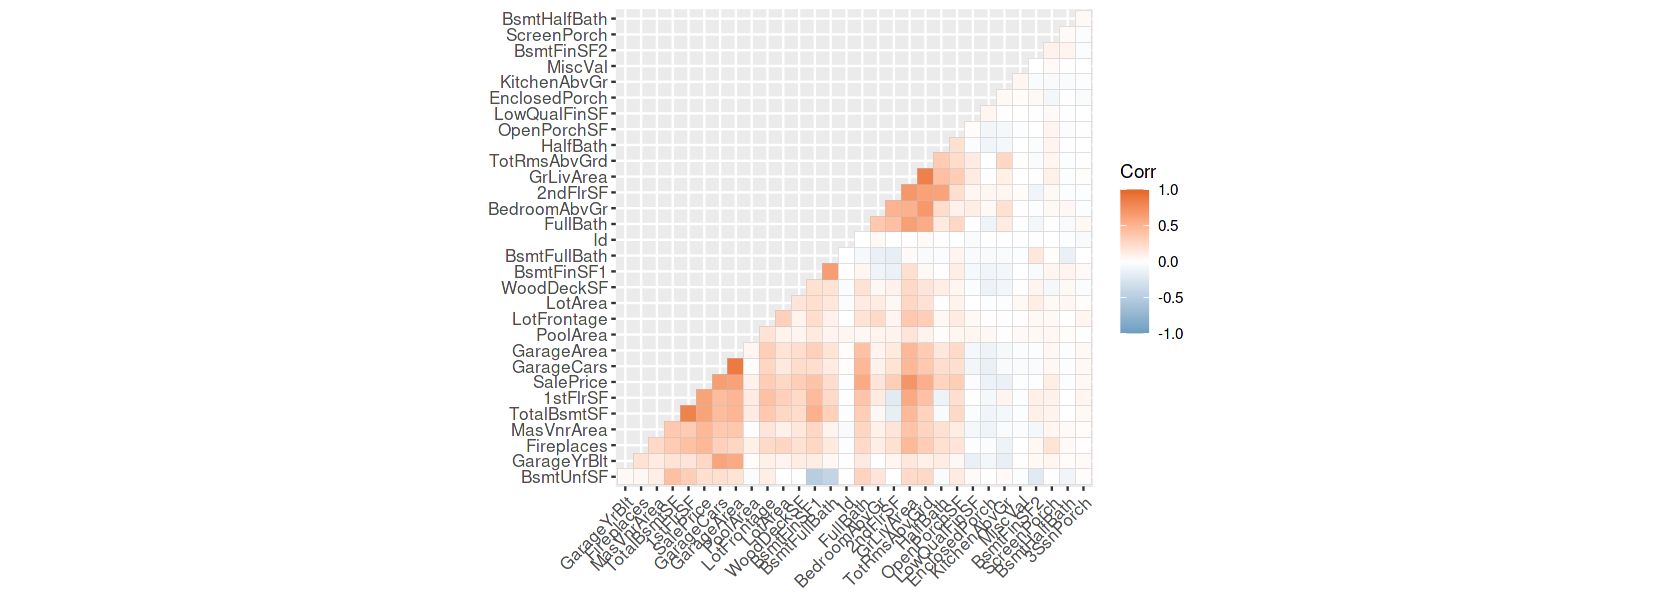

In [28]:
# Correlation matrix and plot
df_num <- df[, sapply(df, class) == "numeric"]
cor <- cor(df_num)
ggcorrplot(cor, hc.order = TRUE, insig = "blank",
           type = "lower", ggtheme = theme_gray,
           colors = c("#6D9EC1", "white", "#E46726"),
           tl.cex = 10)

**Note:** Next, we will only filter out relatively and highly correlated relationship with coefficient between 0.7 and 1 (non-inclusive to avoid pairs of identical variables).

In [29]:
findCorrelation(x=cor, cutoff = .7, names=TRUE)

[1] "GrLivArea"  "1stFlrSF"   "GarageCars"

# 7. Machine Learning Set-Up

Under this section, we will explain the procedure of two main splitting approach to estimate our models' performance.

In [30]:
## Training Testing Split
N <- nrow(df)
trainingSize  <- round(N*0.7)
trainingCases <- sample(N, trainingSize)
train <- df[trainingCases,]
test <- df[-trainingCases,]

In [31]:
# K-Fold Cross Validation
train.control <- trainControl(method = "cv", number = 10, verboseIter = FALSE)
# Train the model
model <- train(SalePrice ~., data = df, method = "lm",
               trControl = train.control)

# Making predictions
# pred <- predict(model, train)
# obs <- train$SalePrice
# rmse(obs, pred)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFi

**Takeaway:** Based on the printout above, it will inform us about a multicollinearity issue we need to solve. So, before building any new model, we will test various techniques to solve it.